# Project: Wrangling and Analyzing Data - WeRateDogs

### By Emmanuel Chisom Egwuonwu

## Table of Content

1. [Introduction](#section_id) <a id='section_id'></a>
2. [Data Gathering](#section_id) <a id='section_id'></a>
3. [Assessing Data](#section_id) <a id='section_id'></a>
   
   a. [Quality Issues](#section_id) <a id='section_id'></a>
   
   b. [Tidiness Issues](#section_id) <a id='section_id'></a>
   
4. [Data Cleaning](#section_id) <a id='section_id'></a>
5. [Data storing](#section_id) <a id='section_id'></a>
6. [Data analyzing and Visualizations](#section_id) <a id='section_id'></a>


## Introduction

In this project, a couple of wrangling efforts will be used to wrangle the WeRateDogs datasets. The data wrangling steps involves Data Gathering, Data Assessing, Data Cleaning, Data Analyzing and Visualizations.

## Data Gathering

### Importing Libraries

In [1]:
# Import all the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import os
import random
import tweepy
import requests
from tweepy import OAuthHandler
from timeit import default_timer as timer
import warnings
import re


## Data Gathering

In the Data Gathering section, the three datasets relevant to this analysis were gathered using different means. First, the twitter_archive file was downloaded directly from the Udacity project page. The Image Prediction file was downloaded using the Request library from this url: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv and finally, the tweet_json file was querried using the Tweepy library and the twitter API provided, and thereafter each tweet was read line by line into a dataframe.

In [2]:
# Read the twitter_archive data into a dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv')


In [3]:
# Use the Request library to download the image prediction file from the below url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

# Read the Image Prediction data into a dataframe
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')


In [4]:
# Personal API keys, secrets, and tokens have been replaced with placeholders
api_key = 'HIDDEN API KEY'
api_key_secret = 'HIDDEN API KEY SECRET'
access_token = 'HIDDEN ACCESS TOKEN'
access_token_secret = 'HIDDEN TOKEN SECRET'

# Create variables for tweepy query
auth = OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)



In [5]:
# Create a loop which will add each available tweet to a new line of tweet_json.txt
count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as json_file:
    for tweet_id in twitter_archive['tweet_id']:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, json_file)
            json_file.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
2: 892177421306343426
3: 891815181378084864
4: 891689557279858688
5: 891327558926688256
6: 891087950875897856
7: 890971913173991426
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
11: 890006608113172480
12: 889880896479866881
13: 889665388333682689
14: 889638837579907072
15: 889531135344209921
16: 889278841981685760
17: 888917238123831296
18: 888804989199671297
19: 888554962724278272
20: 888202515573088257
Fail
21: 888078434458587136
22: 887705289381826560
23: 887517139158093824
24: 887473957103951883
25: 887343217045368832
26: 887101392804085760
27: 886983233522544640
28: 886736880519319552
29: 886680336477933568
30: 886366144734445568
31: 886267009285017600
32: 886258384151887873
33: 886054160059072513
34: 885984800019947520
35: 885528943205470208
36: 885518971528720385
37: 885311592912609280
38: 885167619883638784
39: 884925521741709313
40: 884876753390489601
41: 884562892145688576
42: 884441805382717440
43: 884247878851493888
44: 88416267058

344: 832040443403784192
345: 832032802820481025
346: 831939777352105988
347: 831926988323639298
348: 831911600680497154
349: 831670449226514432
350: 831650051525054464
351: 831552930092285952
352: 831322785565769729
353: 831315979191906304
354: 831309418084069378
355: 831262627380748289
356: 830956169170665475
357: 830583320585068544
358: 830173239259324417
359: 830097400375152640
360: 829878982036299777
361: 829861396166877184
362: 829501995190984704
363: 829449946868879360
364: 829374341691346946
Fail
365: 829141528400556032
366: 829011960981237760
367: 828801551087042563
368: 828770345708580865
369: 828708714936930305
370: 828650029636317184
371: 828409743546925057
372: 828408677031882754
373: 828381636999917570
374: 828376505180889089
375: 828372645993398273
376: 828361771580813312
377: 828046555563323392
378: 828011680017821696
379: 827933404142436356
380: 827653905312006145
381: 827600520311402496
382: 827324948884643840
383: 827228250799742977
Fail
384: 827199976799354881
385: 8

685: 788178268662984705
686: 788150585577050112
687: 788070120937619456
688: 788039637453406209
689: 787810552592695296
690: 787717603741622272
691: 787397959788929025
692: 787322443945877504
693: 787111942498508800
694: 786963064373534720
695: 786729988674449408
696: 786709082849828864
697: 786664955043049472
698: 786595970293370880
699: 786363235746385920
700: 786286427768250368
701: 786233965241827333
702: 786051337297522688
703: 786036967502913536
704: 785927819176054784
705: 785872687017132033
706: 785639753186217984
707: 785533386513321988
708: 785515384317313025
709: 785264754247995392
710: 785170936622350336
711: 784826020293709826
712: 784517518371221505
713: 784431430411685888
714: 784183165795655680
715: 784057939640352768
716: 783839966405230592
717: 783821107061198850
718: 783695101801398276
719: 783466772167098368
720: 783391753726550016
721: 783347506784731136
722: 783334639985389568
723: 783085703974514689
724: 782969140009107456
725: 782747134529531904
726: 78272259879

Rate limit reached. Sleeping for: 253


902: 758474966123810816
903: 758467244762497024
904: 758405701903519748
905: 758355060040593408
906: 758099635764359168
907: 758041019896193024
908: 757741869644341248
909: 757729163776290825
910: 757725642876129280
911: 757611664640446465
912: 757597904299253760
913: 757596066325864448
914: 757400162377592832
915: 757393109802180609
916: 757354760399941633
917: 756998049151549440
918: 756939218950160384
919: 756651752796094464
920: 756526248105566208
921: 756303284449767430
922: 756288534030475264
923: 756275833623502848
924: 755955933503782912
925: 755206590534418437
926: 755110668769038337
927: 754874841593970688
928: 754856583969079297
929: 754747087846248448
930: 754482103782404096
931: 754449512966619136
932: 754120377874386944
933: 754011816964026368
Fail
934: 753655901052166144
935: 753420520834629632
936: 753398408988139520
937: 753375668877008896
938: 753298634498793472
939: 753294487569522689
940: 753039830821511168
941: 753026973505581056
942: 752932432744185856
943: 752917

1234: 712809025985978368
1235: 712717840512598017
1236: 712668654853337088
1237: 712438159032893441
1238: 712309440758808576
1239: 712097430750289920
1240: 712092745624633345
1241: 712085617388212225
1242: 712065007010385924
1243: 711998809858043904
1244: 711968124745228288
1245: 711743778164514816
1246: 711732680602345472
1247: 711694788429553666
1248: 711652651650457602
1249: 711363825979756544
1250: 711306686208872448
1251: 711008018775851008
1252: 710997087345876993
1253: 710844581445812225
1254: 710833117892898816
1255: 710658690886586372
1256: 710609963652087808
1257: 710588934686908417
1258: 710296729921429505
1259: 710283270106132480
1260: 710272297844797440
1261: 710269109699739648
1262: 710153181850935296
1263: 710140971284037632
1264: 710117014656950272
1265: 709918798883774466
1266: 709901256215666688
1267: 709852847387627521
1268: 709566166965075968
1269: 709556954897764353
1270: 709519240576036864
1271: 709449600415961088
1272: 709409458133323776
1273: 709225125749587968


1562: 688385280030670848
1563: 688211956440801280
1564: 688179443353796608
1565: 688116655151435777
1566: 688064179421470721
1567: 687841446767013888
1568: 687826841265172480
1569: 687818504314159109
1570: 687807801670897665
1571: 687732144991551489
1572: 687704180304273409
1573: 687664829264453632
1574: 687494652870668288
1575: 687480748861947905
1576: 687476254459715584
1577: 687460506001633280
1578: 687399393394311168
1579: 687317306314240000
1580: 687312378585812992
1581: 687127927494963200
1582: 687124485711986689
1583: 687109925361856513
1584: 687102708889812993
1585: 687096057537363968
1586: 686947101016735744
1587: 686760001961103360
1588: 686749460672679938
1589: 686730991906516992
1590: 686683045143953408
1591: 686618349602762752
1592: 686606069955735556
1593: 686394059078897668
1594: 686386521809772549
1595: 686377065986265092
1596: 686358356425093120
1597: 686286779679375361
1598: 686050296934563840
1599: 686035780142297088
1600: 686034024800862208
1601: 686007916130873345


Rate limit reached. Sleeping for: 283


1802: 676957860086095872
1803: 676949632774234114
1804: 676948236477857792
1805: 676946864479084545
1806: 676942428000112642
1807: 676936541936185344
1808: 676916996760600576
1809: 676897532954456065
1810: 676864501615042560
1811: 676821958043033607
1812: 676819651066732545
1813: 676811746707918848
1814: 676776431406465024
1815: 676617503762681856
1816: 676613908052996102
1817: 676606785097199616
1818: 676603393314578432
1819: 676593408224403456
1820: 676590572941893632
1821: 676588346097852417
1822: 676582956622721024
1823: 676575501977128964
1824: 676533798876651520
1825: 676496375194980353
1826: 676470639084101634
1827: 676440007570247681
1828: 676430933382295552
1829: 676263575653122048
1830: 676237365392908289
1831: 676219687039057920
1832: 676215927814406144
1833: 676191832485810177
1834: 676146341966438401
1835: 676121918416756736
1836: 676101918813499392
1837: 676098748976615425
1838: 676089483918516224
1839: 675898130735476737
1840: 675891555769696257
1841: 675888385639251968


2130: 670290420111441920
2131: 670093938074779648
2132: 670086499208155136
2133: 670079681849372674
2134: 670073503555706880
2135: 670069087419133954
2136: 670061506722140161
2137: 670055038660800512
2138: 670046952931721218
2139: 670040295598354432
2140: 670037189829525505
2141: 670003130994700288
2142: 669993076832759809
2143: 669972011175813120
2144: 669970042633789440
2145: 669942763794931712
2146: 669926384437997569
2147: 669923323644657664
2148: 669753178989142016
2149: 669749430875258880
2150: 669684865554620416
2151: 669683899023405056
2152: 669682095984410625
2153: 669680153564442624
2154: 669661792646373376
2155: 669625907762618368
2156: 669603084620980224
2157: 669597912108789760
2158: 669583744538451968
2159: 669573570759163904
2160: 669571471778410496
2161: 669567591774625800
2162: 669564461267722241
2163: 669393256313184256
2164: 669375718304980992
2165: 669371483794317312
2166: 669367896104181761
2167: 669363888236994561
2168: 669359674819481600
2169: 669354382627049472


In [6]:
# Length of failed query
len(fails_dict)

29

In [7]:
# Create a loop to append each tweet into a list
tweet_data = []
with open('tweet_json.txt', 'r') as tweet_file:
    for line in tweet_file:
        try:
            tweet = json.loads(line)
            tweet_data.append(tweet)
        except:
            continue
tweet_file.close()

            

In [8]:
# Load tweets_info into a dataframe
tweets_info = pd.DataFrame()

In [9]:
# Add selected variables to tweet_info DataFrame
tweets_info['id'] = list(map(lambda tweet: tweet['id'], tweet_data))
tweets_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweet_data))
tweets_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweet_data))
tweets_info['created_at'] = list(map(lambda tweet: tweet['created_at'], tweet_data))

# Rename column 'id' to 'tweet_id'
tweets_info = tweets_info.rename(columns = {'id': 'tweet_id'})


## Assessing Data

In this section, the datasets gathered were assessed carefully using both visual and programmatic assessment technique. The quality and tidiness issues observed from these datasets were documented. 


### Visual Assessment

In [10]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
tweets_info

,tweet_id,retweet_count,favorite_count,created_at
0,892420643555336193,6962,33669,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,5268,29211,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,3463,21958,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,7190,36763,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,7709,35122,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
2322,666049248165822465,36,88,Mon Nov 16 00:24:50 +0000 2015
2323,666044226329800704,114,246,Mon Nov 16 00:04:52 +0000 2015
2324,666033412701032449,36,100,Sun Nov 15 23:21:54 +0000 2015
2325,666029285002620928,39,112,Sun Nov 15 23:05:30 +0000 2015


### Programmatic Assessment

In [13]:
# View the first 10 rows of the twitter_archive dataframe
twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
# # View the last 10 rows of the twitter_archive dataframe
twitter_archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [15]:
#View the infomation of the twitter_archive dataframe
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
# view the shape
twitter_archive.shape

(2356, 17)

In [17]:
# Show a description of the twitter_archive dataframe
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
# Show the sum of null entries in the twitter_archive dataframe
twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [19]:
# Show the sum of duplicated values in the twitter_archive dataframe
twitter_archive['tweet_id'].duplicated().sum()

0

In [20]:
# View the first 10 rows of the Image_Prediction dataframe
image_prediction.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [21]:
# View the last 10 rows of the Image_Prediction dataframe
image_prediction.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [22]:
# Show information of the Image_Prediction dataframe
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
# Show a description of the Image_Prediction dataframe
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
# Show the shape of the Image_Prediction dataframe
image_prediction.shape

(2075, 12)

In [25]:
# Show the sum of null entries in the Image_Prediction dataframe
image_prediction.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [26]:
# Show the sum of duplicated entries in the Image_Prediction dataframe
image_prediction['tweet_id'].duplicated().sum()

0

In [27]:
# Show True and false value counts for p1_dog
image_prediction.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [28]:
# Show True and false value counts for p2_dog
image_prediction.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [29]:
# Show True and false value counts for p3_dog
image_prediction.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [30]:
# Show all the predictions that returns a False value
image_prediction[~image_prediction.p1_dog & \
                 ~image_prediction.p2_dog & \
                 ~image_prediction.p3_dog][['tweet_id', 'p1', 'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog']].head(10)

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
17,666104133288665088,hen,False,cock,False,partridge,False
18,666268910803644416,desktop_computer,False,desk,False,bookcase,False
21,666293911632134144,three-toed_sloth,False,otter,False,great_grey_owl,False
25,666362758909284353,guinea_pig,False,skunk,False,hamster,False
29,666411507551481857,coho,False,barracouta,False,gar,False
45,666786068205871104,snail,False,slug,False,acorn,False
50,666837028449972224,triceratops,False,armadillo,False,common_iguana,False
51,666983947667116034,swab,False,chain_saw,False,wig,False
53,667012601033924608,hyena,False,African_hunting_dog,False,coyote,False


In [31]:
# Show the first 10 rows of the tweets_info dataframe
tweets_info.head(10)

,tweet_id,retweet_count,favorite_count,created_at
0,892420643555336193,6962,33669,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,5268,29211,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,3463,21958,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,7190,36763,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,7709,35122,Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,2583,17735,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,1646,10311,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,15668,56622,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,3601,24397,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,6063,27813,Wed Jul 26 15:59:51 +0000 2017


In [32]:
# Show the last 10 rows of the tweets_info dataframe
tweets_info.tail(10)

,tweet_id,retweet_count,favorite_count,created_at
2317,666058600524156928,47,99,Mon Nov 16 01:01:59 +0000 2015
2318,666057090499244032,111,247,Mon Nov 16 00:55:59 +0000 2015
2319,666055525042405380,196,366,Mon Nov 16 00:49:46 +0000 2015
2320,666051853826850816,697,1022,Mon Nov 16 00:35:11 +0000 2015
2321,666050758794694657,50,115,Mon Nov 16 00:30:50 +0000 2015
2322,666049248165822465,36,88,Mon Nov 16 00:24:50 +0000 2015
2323,666044226329800704,114,246,Mon Nov 16 00:04:52 +0000 2015
2324,666033412701032449,36,100,Sun Nov 15 23:21:54 +0000 2015
2325,666029285002620928,39,112,Sun Nov 15 23:05:30 +0000 2015
2326,666020888022790149,419,2282,Sun Nov 15 22:32:08 +0000 2015


In [33]:
# Show information of the tweets_info dataframe
tweets_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
 3   created_at      2327 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [34]:
# Show the shape of the tweets_info dataframe
tweets_info.shape


(2327, 4)

In [35]:
# Show the description of the tweets_info dataframe
tweets_info.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2456.822518,7019.045122
std,6.820795e+16,4160.094465,10905.701485
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,492.500000,1219.000000
50%,7.178418e+17,1143.000000,3032.000000
75%,7.986547e+17,2843.500000,8557.500000
max,8.924206e+17,70253.000000,144031.000000


In [36]:
# Show the sum of null entries in the tweets_info dataframe
tweets_info.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
created_at        0
dtype: int64

In [37]:
# Show the sum of duplicate entries in the tweets_info dataframe
tweets_info['tweet_id'].duplicated().sum()

0

In [38]:
# Print the datatypes of the twitter_archive dataframe
datatype = twitter_archive.dtypes
print(datatype)

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object


In [39]:
# Print datatype of the 'timestamp' column
print('Datatype for timestamp is: ' + str(type(twitter_archive.timestamp[0])))

Datatype for timestamp is: <class 'str'>


In [40]:
# Shows the value counts of the names in the twitter_archive dataframe
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [41]:
# Shows a value counts of the names with lowercase in the twitter_archive dataframe
error_names = twitter_archive.name.str.contains('^[a-z]', regex = True)
twitter_archive[error_names].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [42]:
# Shows text that contains 'name is'
twitter_archive.loc[error_names & (twitter_archive['text'].str.contains('name is'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,None,None,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989...,8,10,a,None,None,None,None


In [43]:
# Shows text that contains 'named'
twitter_archive.loc[error_names & (twitter_archive['text'].str.contains('named'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639...,10,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718...,10,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150...,11,10,a,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085...,9,10,a,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,9,10,a,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874...,9,10,a,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,9,10,a,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10,10,a,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461...,10,10,a,None,None,None,None
2191,668955713004314625,NaN,NaN,2015-11-24 00:54:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Slovakian Helter Skelter Feta named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668955713...,10,10,a,None,None,None,None


In [44]:
# Gives the lenth of names with lower cases
len(twitter_archive[error_names])


109

In [45]:
# Shows the maximum rating denomnator
maxx = twitter_archive['rating_denominator'].max()
print('The max denominator is :' + str(maxx))

The max denominator is :170


In [46]:
# Shows the minimum rating denominator
minn = twitter_archive['rating_denominator'].min()
print('The max denominator is :' + str(minn))

The max denominator is :0


In [47]:
# Gives a value counts of the rating denominator
twitter_archive.rating_denominator.value_counts().sort_values(ascending = False)

10     2333
50        3
11        3
20        2
80        2
90        1
120       1
16        1
110       1
130       1
40        1
170       1
0         1
150       1
15        1
7         1
70        1
2         1
Name: rating_denominator, dtype: int64

In [48]:
# Gives the sum of denominator not equal to 10
sum(twitter_archive.rating_denominator!= 10)

23

In [49]:
# Shows the denominator not equal to 10 and neither a reply to status nor a retweet
error_denom = (twitter_archive.rating_denominator != 10)& \
                twitter_archive.in_reply_to_status_id.isna()& \
                twitter_archive.retweeted_status_id.isna()

error_cols = ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']
twitter_archive[error_denom][error_cols]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the flo...,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
902,758467244762497024,Why does this never happen at my front door......,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very pre...,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",45,50


In [50]:
# Gives the sum of the denominator not equal to 10 and neither a reply to status nor a retweet
sum(error_denom)


17

In [51]:
# Shows the maximum rating numerator
maxx1 = twitter_archive['rating_numerator'].max()
print('The max numerator is :' + str(maxx1))

The max numerator is :1776


In [52]:
# Shows the minimum rating numerator
minn1 = twitter_archive['rating_numerator'].min()
print('The max numerator is :' + str(minn1))

The max numerator is :0


In [53]:
# Gives a value counts of the rating numerator
twitter_archive.rating_numerator.value_counts().sort_values(ascending = False)

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
420       2
0         2
75        2
15        2
84        1
960       1
99        1
24        1
182       1
27        1
666       1
165       1
1776      1
204       1
17        1
50        1
45        1
60        1
44        1
143       1
121       1
20        1
26        1
144       1
80        1
88        1
Name: rating_numerator, dtype: int64

In [54]:
# Gives the sum of numerator greater than 20
sum(twitter_archive.rating_numerator >= 20)

25

In [55]:
# Gives the value counts of all rating numerator for rating denominator equal to 10
denom_10 = twitter_archive[twitter_archive.rating_denominator == 10]
denom_10.rating_numerator.value_counts().sort_values(ascending = False)

12      558
11      463
10      461
13      351
9       156
8       102
14       54
7        54
5        37
6        32
3        19
4        15
2         9
1         8
75        2
15        2
420       2
0         2
182       1
666       1
27        1
17        1
1776      1
26        1
Name: rating_numerator, dtype: int64

In [56]:
# Shows the entries where rationg denominator = 10 and rating numerator is greater than 20, and neither a reply to status nor
# a retweeted status
error_num = (twitter_archive.rating_denominator == 10)& \
            (twitter_archive.rating_numerator >= 20)& \
            twitter_archive.in_reply_to_status_id.isna()& \
            twitter_archive.retweeted_status_id.isna()

error_cols1 = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
twitter_archive[error_num][error_cols1]

,text,tweet_id,rating_numerator,rating_denominator
695,"This is Logan, the Chow who lived. He solemnly...",786709082849828864,75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,778027034220126208,27,10
979,This is Atticus. He's quite simply America af....,749981277374128128,1776,10
1712,Here we have uncovered an entire battalion of ...,680494726643068929,26,10
2074,After so many requests... here you go.\n\nGood...,670842764863651840,420,10


In [57]:
# Shows the text that contains '&amp' instead of '&'
twitter_archive[twitter_archive.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Indie. She's not a fan of baths but she's...,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https...",12,10,Indie,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Pipsy. He is a fluffbal...,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chester (bottom) &amp; Harold (top). They...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053...,12,10,Chester,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's preparing for takeoff. Ma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264...,11,10,Roosevelt,None,None,None,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
898,758854675097526272,NaN,NaN,2016-07-29 02:40:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilli Bee &amp; Honey Bear. Unfortunat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758854675...,11,10,Lilli,None,None,None,None
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None


In [58]:
# Show maximum column width while ignoring warnings
warnings.simplefilter('ignore')

with pd.option_context('max_colwidth', 250):
    display(twitter_archive[twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator','rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [59]:
# Gives the sum of null expanded urls
sum(twitter_archive.expanded_urls.isna())

59

In [60]:
# Gives the sum of null expanded urls that are either a reply to status or a retweet
sum(twitter_archive.expanded_urls.isna() & \
   (twitter_archive.in_reply_to_status_id.notnull() | \
   (twitter_archive.retweeted_status_id.notnull())))

56

In [61]:
# Gives the arrangement of counts of each dog stage 
twitter_archive.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


### Quality issues

1. The 'expanded_urls' column contains null entries and duplicated entries

2. The twitter archive dataset contains retweets that needs to be removed

3. The twitter_archive dataframe contains irrelevant columns that won't be used for the analysis such as 'in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'.

4. The timestamp datatype is incorrect

5. Some texts in the text column contains  '&amp' instead of '&'

6. Incorrect dog names

7. Incorrect extraction of ratings from the text column

8. Incorrect entries for ratings with decimal numerators

9. We need only one column each for the dog_breed and confidence level

10. The image_prediction dataframe contains duplicated jpg_urls

11. Incorrect datatypes for the retweet count and favorite count

### Tidiness issues

1. There are four columns showing dog stages that could be melted into one.

2. The three dataframes needs to be merged into one main dataframe



## Cleaning Data

In this section, the quality and tidiness issues noted from the Assessing section were carefully cleaned.

In [98]:
# Making copies of the original datasets
twitter_archive_clean = twitter_archive.copy()
img_predict_clean = image_prediction.copy()
tweets_info_clean = tweets_info.copy()


### Tidiness Issue 1

#### Define

Replace entries with 'None' or 'NaN' with an empty string ' ', then, concatenates dog stages entries from the four columns into a new column 'dog_stage', thereafter separate double dog stages with a comma. 


#### Code

In [99]:
# Replace entries with 'None' or 'NaN' with an empty string in all dog stages
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.doggo.replace(np.NaN, '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace(np.NaN, '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace(np.NaN, '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace(np.NaN, '', inplace=True)

# Create a new column 'dog_stage' that concatenates entries from the four dog stages
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + \
                                        twitter_archive_clean.pupper + twitter_archive_clean.puppo

# Separate entries with two dog stages with a comma
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [100]:
# Drop irrelevant columns from the Dataframe
drops = ['pupper', 'puppo', 'doggo', 'floofer']
twitter_archive_clean = twitter_archive_clean.drop(drops, axis = 1)

#### Test

In [101]:
twitter_archive_clean.dog_stage.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

### Quality Issue 1

#### Define

Drop all the null entries in the 'expanded_urls' column and drop the duplicated urls in the 'expanded_urls' column

#### Code

In [102]:
# Drop the null entries in the 'expanded_urls' columns
twitter_archive_clean = twitter_archive_clean.dropna(subset = ['expanded_urls'])

In [103]:
# Drop all the duplicated urls in the expanded_urls column
twitter_archive_clean = twitter_archive_clean.drop_duplicates(subset = ['expanded_urls'], keep ='last')


#### Test

In [104]:
sum(twitter_archive_clean.expanded_urls.duplicated())

0

In [105]:
sum(twitter_archive_clean['expanded_urls'].notnull())

2218

### Quality Issue 2

#### Define

Drop all rows containing retweets, where these columns will be non-null: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

#### Code

In [106]:
# Drop all rows containing non null retweet entries from the retweeted_status_id
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isna()]

# Drop all rows containing non null retweet entries from the retweeted_status_user_id
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isna()]

# Drop all rows containing non null retweet entries from the retweeted_status_timestamp
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isna()]

#### Test

In [107]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2116 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2116 non-null   object 
 4   source                      2116 non-null   object 
 5   text                        2116 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2116 non-null   object 
 10  rating_numerator            2116 non-null   int64  
 11  rating_denominator          2116 non-null   int64  
 12  name                        2116 non-null   object 
 13  dog_stage                   2116 

### Quality Issue 3

#### Define

Drop all the irrelevant columns such as 'in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp' from the twitter_archive_clean dataframe.

#### Code

In [108]:
# Drop all the irrelevant columns from the twitter_archive_clean dataframe
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                    'source', 'retweeted_status_id',
                                                    'retweeted_status_user_id',
                                                    'retweeted_status_timestamp'], axis = 1)

#### Test

In [109]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

### Quality Issue 4

#### Define 

Convert the 'timestamp' datatype to datetime.

#### Code

In [110]:
# Convert the datatype to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [111]:
twitter_archive_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
dog_stage                          object
dtype: object

### Quality Issue 5

#### Define

Replace all entries that contain '&amp' in the 'text' column with '&'

#### Code

In [112]:
# Replace all entries that contain '&amp' in the 'text' column with '&'
twitter_archive_clean['text'] = twitter_archive_clean['text'].str.replace('&amp;', '&')

#### Test

In [113]:
sum(twitter_archive_clean['text'].str.contains('&amp;'))

0

### Quality Issue 6

#### Define

Change all the incorrect dog names to the correct names extracted from the 'text' column using a regex function. 

#### Code

In [114]:
# Create a variable to save locations where 'name' column is lowercase and 'text' column contains 'named' 
# and 'text' column contains the words 'name is'
mask_named = twitter_archive_clean.name.str.contains('^[a-z]', regex = True) & \
            (twitter_archive_clean['text'].str.contains('named'))
mask_name_is = twitter_archive_clean.name.str.contains('^[a-z]', regex = True) & \
            (twitter_archive_clean['text'].str.contains('name is'))
mask_no_name = twitter_archive_clean.name.str.contains('^[a-z]', regex = True)

#Save this locations to a list
mask_named_list = mask_named.tolist()
mask_name_is_list = mask_name_is.tolist()
mask_no_name_list = mask_no_name.tolist()

# For loop to iterate through locations where name is lowercase and the words 'named' appear in 'text' and set the 'name' 
# value to be the word that appears after 'named

for data in mask_named_list:
    mask = twitter_archive_clean.text == data
    column_name = 'name'
    twitter_archive_clean.loc[mask, column_name] = re.findall(r"named\s(\w+)", str(data))
    
# For loop to iterate through locations where name is lowercase and the words 'name is' appear in 'text' and set the 'name' 
# value to be the word that appears after 'name is'

for data in mask_name_is_list:
    mask = twitter_archive_clean.text == data
    column_name = 'name'
    twitter_archive_clean.loc[mask, column_name] = re.findall(r"name is\s(\w+)", str(data))
    
# For loop to iterate through locations where name is lowercase and replace the name value with the word "None"  

for data in mask_no_name_list:
    mask = twitter_archive_clean.text == data
    column_name = 'name'
    twitter_archive_clean.loc[mask, column_name] =  'No Name'

# Replace the occurence of "O" with "O'Malley"
twitter_archive_clean.name = twitter_archive_clean.name.replace('O', "O'Malley")


#### Test

In [115]:
twitter_archive_clean[twitter_archive_clean.name == "O'Malley"]
    

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
775,776201521193218049,2016-09-14 23:30:38+00:00,This is O'Malley. That is how he sleeps. Doesn...,https://twitter.com/dog_rates/status/776201521...,10,10,O'Malley,


### Quality Issue 7

#### Define

Correct all the ratings being extracted incorrectly from the 'text' column using a regex function.

#### Code

In [116]:
# Save the text where the rating numerator and denominators were incorrectly extracted
wrong_rating_extraction = ['After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ', 
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a', 
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq', 
 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5',
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']

In [117]:
# Loop through the list of ratings to fix and extract the second occurence of #/ to save as the rating numerator. Since all the
# occurences of the actual ratings in the ratings to fix list have a denominator of 10, we will set that value for each 
#entry instead of extracting it.

for data in wrong_rating_extraction:
    error = twitter_archive_clean.text == data
    column_1 = 'rating_numerator'
    column_2 = 'rating_denominator'
    twitter_archive_clean.loc[error, column_1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", data)
    twitter_archive_clean.loc[error, column_2] = 10

#### Test

In [118]:
twitter_archive_clean[twitter_archive_clean.text.isin(wrong_rating_extraction)]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1068,740373189193256964,2016-06-08 02:41:38+00:00,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,None,
1165,722974582966214656,2016-04-21 02:25:47+00:00,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13,10,None,
1202,716439118184652801,2016-04-03 01:36:11+00:00,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,
1662,682962037429899265,2016-01-01 16:30:13+00:00,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,
2335,666287406224695296,2015-11-16 16:11:11+00:00,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,an,


### Quality Issue 8

#### Define

Fix rating numerators that contain decimals by manually setting the correct numerators of those ratings.

#### Code

In [119]:
# View ratings with decimals in 'text' column
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*/\d+)")]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
45,883482846933004288,2017-07-08 00:28:19+00:00,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,
695,786709082849828864,2016-10-13 23:23:56+00:00,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,
763,778027034220126208,2016-09-20 00:24:34+00:00,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper
1712,680494726643068929,2015-12-25 21:06:00+00:00,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,


In [120]:
# Change datatype of rating_numerator and denominator to float
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator', \
                                                                    'rating_denominator']].astype(float)

In [121]:
twitter_archive_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
name                               object
dog_stage                          object
dtype: object

In [122]:
# Manually set the correct numerators for those ratings
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26


#### Test

In [123]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*/\d+)")]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
45,883482846933004288,2017-07-08 00:28:19+00:00,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10.0,Bella,
695,786709082849828864,2016-10-13 23:23:56+00:00,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,
763,778027034220126208,2016-09-20 00:24:34+00:00,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10.0,Sophie,pupper
1712,680494726643068929,2015-12-25 21:06:00+00:00,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10.0,None,


### Tidiness Issue 2

#### Define

Merge the twitter_archive_clean dataset with the tweets_info_clean dataset

#### Code

In [124]:
#create a variable that contains the columns you want to merge
mask_columns = ['tweet_id', 'retweet_count', 'favorite_count']

# Merge the twitter_archive_clean dataset with the tweets_info_clean dataset
twitter_archive_clean = pd.merge(twitter_archive_clean, tweets_info_clean[mask_columns], on ='tweet_id', how = 'inner')

#### Test

In [125]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,6962,33669
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,5268,29211
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,3463,21958
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,7190,36763
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,7709,35122


### Quality Issue 9

#### Define

Create two new columns in img_predict_clean dataframe called dog_breed and confidence, then check each dog breed prediction in order (p1_dog, p2_dog, p3_dog), and copy the breed with the highest confidence level into the dog_breed column.
Copy the associated confidence level into the new confidence column.
For cases where all 3 prediction flags are False (NOT a valid dog breed), set breed as 'None' and confidence to 0.

#### Code

In [126]:
# Create a selection condition
selection_cond = [(img_predict_clean['p1_dog'] == True), \
                 (img_predict_clean['p2_dog'] == True), \
                 (img_predict_clean['p3_dog'] == True)]

# Set the choice order based on the selection conditions for predicted breed
breed_choice = [img_predict_clean['p1'], img_predict_clean['p2'], img_predict_clean['p3']]

# Set the choice order for confidence level based on the selection conditions
choice_conf = [img_predict_clean['p1_conf'], img_predict_clean['p2_conf'], img_predict_clean['p3_conf']]

# Select the predicted breed based on the first successful condition
img_predict_clean['dog_breed'] = np.select(selection_cond, breed_choice, default = 'None')

# Select the predicted confidence level based on the first successful condition
img_predict_clean['confidence'] = np.select(selection_cond, choice_conf, default = 0)

# Multiply the confidence values by 100 and convert to 'int' datatype
img_predict_clean.confidence = (img_predict_clean.confidence* 100).astype(int)

#### Test

In [127]:
img_predict_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,46
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,50
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,59
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,40
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,56
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog,65
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,None,0
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,69
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle,20


### Quality Issue 10

#### Define

Drop duplicated 'jpg_url' from the img_predict_clean dataframe.

#### Code

In [128]:
# Drop all duplicated 'jpg_url'
img_predict_clean = img_predict_clean.drop_duplicates(subset = 'jpg_url', keep = 'last')


#### Test

In [129]:
sum(img_predict_clean.jpg_url.duplicated())

0

### Tidiness Issue 3

#### Define

Merge the twitter_archive_clean dataset with the img_predict_clean dataset based on some selected columns

#### Code

In [130]:
# Merge the twitter_archive_clean dataset with the img_predict_clean dataset based on some selected columns
merge_cols = ['tweet_id', 'jpg_url', 'dog_breed', 'confidence']
twitter_archive_clean = pd.merge(twitter_archive_clean, img_predict_clean[merge_cols], on = 'tweet_id', how = 'outer')

#### Test

In [131]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,dog_breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,6962.0,33669.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,0.0
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,5268.0,29211.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,32.0
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,3463.0,21958.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,71.0
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,7190.0,36763.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,16.0
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,7709.0,35122.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,55.0


### Additional Cleaning 

#### Define

Drop all null entries from the main dataframe and set the retweet and favorite counts to 'int' datatype

#### Code

In [132]:
# Drop all null entries from the main dataframe
twitter_archive_clean.dropna(inplace=True)

In [133]:
# Set the retweet and favorite counts to 'int' datatype
twitter_archive_clean.retweet_count = twitter_archive_clean.retweet_count.astype(int)
twitter_archive_clean.favorite_count = twitter_archive_clean.favorite_count.astype(int)


#### Test

In [134]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921 entries, 0 to 2107
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1921 non-null   int64              
 1   timestamp           1921 non-null   datetime64[ns, UTC]
 2   text                1921 non-null   object             
 3   expanded_urls       1921 non-null   object             
 4   rating_numerator    1921 non-null   float64            
 5   rating_denominator  1921 non-null   float64            
 6   name                1921 non-null   object             
 7   dog_stage           1921 non-null   object             
 8   retweet_count       1921 non-null   int32              
 9   favorite_count      1921 non-null   int32              
 10  jpg_url             1921 non-null   object             
 11  dog_breed           1921 non-null   object             
 12  confidence          1921 non-null 

## Store Data

In this section, the clean data is stored to a CSV file.

In [154]:
# Store the clean dataframe to a CSV file
twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data

In this section, the main dataframe is carefully analyzed and visualized using different plots. A univariate and bivariate plots were created to properly analyze the dataset.

In [155]:
# Making a copy of the main dataframe to be used for analysis
tweets_analysis = twitter_archive_clean.copy()
tweets_analysis.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921 entries, 0 to 2107
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1921 non-null   int64              
 1   timestamp           1921 non-null   datetime64[ns, UTC]
 2   text                1921 non-null   object             
 3   expanded_urls       1921 non-null   object             
 4   rating_numerator    1921 non-null   float64            
 5   rating_denominator  1921 non-null   float64            
 6   name                1921 non-null   object             
 7   dog_stage           1921 non-null   object             
 8   retweet_count       1921 non-null   int32              
 9   favorite_count      1921 non-null   int32              
 10  jpg_url             1921 non-null   object             
 11  dog_breed           1921 non-null   object             
 12  confidence          1921 non-null 

In [156]:
sum(tweets_analysis.isna().value_counts())

1921

In [157]:
# Shows the value counts of the dog breed
tweets_analysis['dog_breed'].value_counts()

None                    302
golden_retriever        143
Labrador_retriever      100
Pembroke                 94
Chihuahua                87
                       ... 
silky_terrier             1
Scotch_terrier            1
Bouvier_des_Flandres      1
clumber                   1
Irish_wolfhound           1
Name: dog_breed, Length: 114, dtype: int64

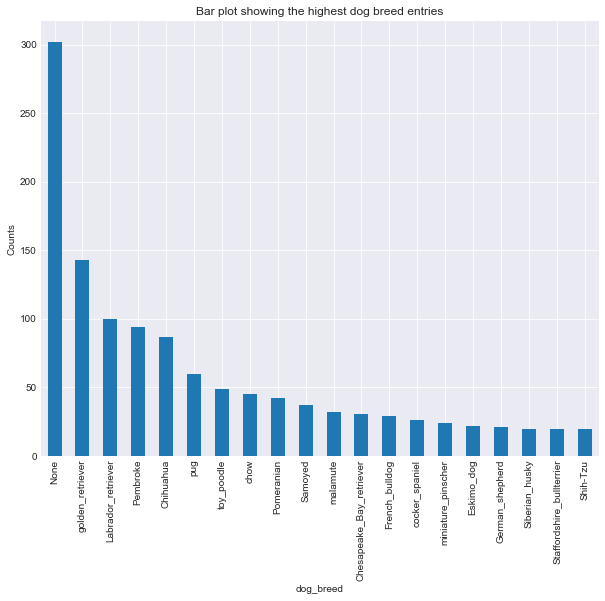

In [166]:
# Create a group of dog breeds with value counts greater than or equal to 20
dog_breed1 = tweets_analysis.groupby('dog_breed').filter(lambda x: len(x) >= 20 )

# Create a bar plot of the group of values
dog_breed1['dog_breed'].value_counts().plot(kind = 'bar', figsize = (10, 8))
plt.title('Bar plot showing the highest dog breed entries')
plt.xlabel('dog_breed')
plt.ylabel('Counts')

fig = plt.gcf()
fig.savefig('output.png',bbox_inches='tight');

In [159]:
# Shows the value counts of the dog stages
tweets_analysis['dog_stage'].value_counts()

                  1626
pupper             199
doggo               59
puppo               21
floofer              7
doggo, pupper        7
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

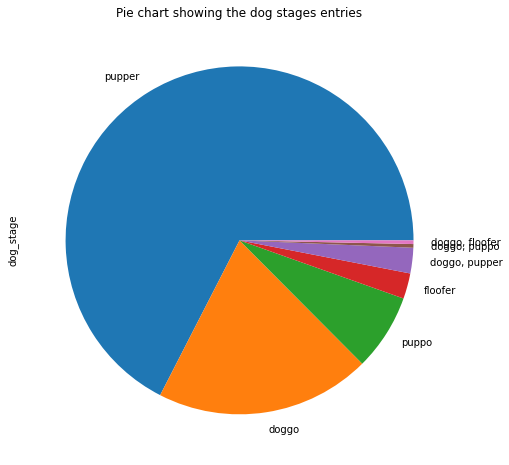

In [142]:
# Create a group of dog stages with value counts less than 250
dog_stage1 = tweets_analysis.groupby('dog_stage').filter(lambda x: len(x) < 250)

# Create a pie chart of the group of values
dog_stage1['dog_stage'].value_counts().plot(kind = 'pie', figsize = (10, 8))
plt.title('Pie chart showing the dog stages entries')
fig = plt.gcf()
fig.savefig('dog_stage.png',bbox_inches='tight');

In [143]:
# Divide rating_numerator by rating_denominator to get a rating_ratio
tweets_analysis['rating_ratio'] = tweets_analysis['rating_numerator']/tweets_analysis['rating_denominator']

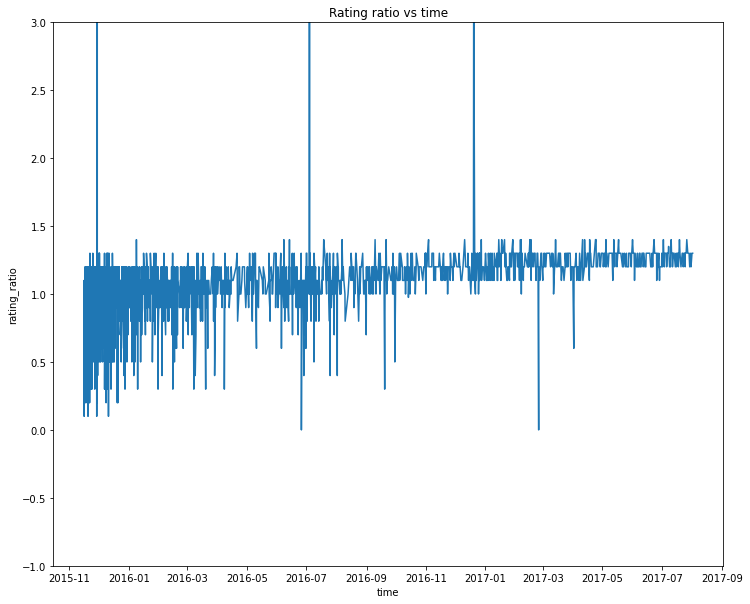

In [144]:
# Plot a line plot showing the rating ratio versus the time it was made
plt.figure(figsize=(12,10))
plt.plot(tweets_analysis['timestamp'], tweets_analysis['rating_ratio'])
plt.ylim(-1, 3)
plt.xlabel('time')
plt.ylabel('rating_ratio')
plt.title('Rating ratio vs time')
plt.savefig('rating_ratio.png')
plt.show()

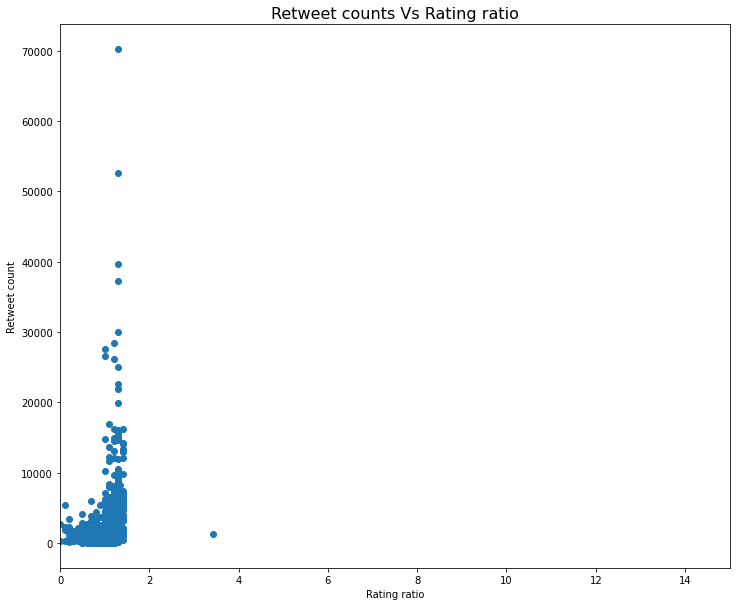

In [145]:
# Plot a scatter plot showing distribution of rating vs retweet count
plt.figure(figsize=(12,10))
plt.scatter(tweets_analysis['rating_ratio'], tweets_analysis['retweet_count'])
plt.xlim(0, 15)
plt.xlabel('Rating ratio')
plt.ylabel('Retweet count')
plt.title('Retweet counts Vs Rating ratio', fontsize = 16)
plt.show();

Text(0, 0.5, 'Rating ratio')

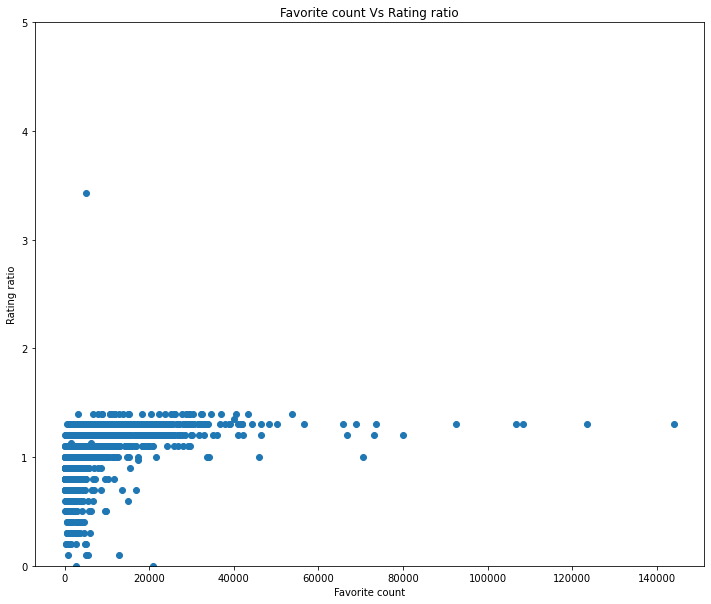

In [146]:
# Plot a scatter plot showing favorite counts vs rating ratio
plt.figure(figsize=(12,10))
plt.scatter(tweets_analysis['favorite_count'], tweets_analysis['rating_ratio'])
plt.ylim(0, 5)
plt.title('Favorite count Vs Rating ratio')
plt.xlabel('Favorite count')
plt.ylabel('Rating ratio')

In [147]:
#Set the index to be the timestamp
tweets_analysis.set_index('timestamp', inplace=True)


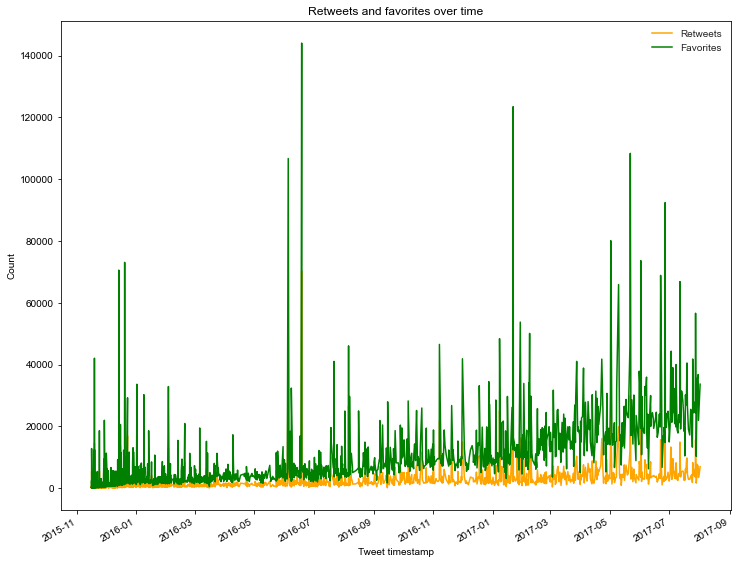

In [148]:
# Create a plot showing retweet counts and favorite counts over time
plt.figure(figsize=(12,10))
tweets_analysis['retweet_count'].plot(color = 'orange', label='Retweets')
tweets_analysis['favorite_count'].plot(color = 'green', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper right')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()

In [149]:
# Create a frequency table from the dataset
tweets_analysis = tweets_analysis.groupby(['tweet_id', 'dog_breed', 'rating_ratio', 'favorite_count', 'retweet_count'])
tweets_analysis.describe()

rating_numerator  \
                                                                                               count   
tweet_id           dog_breed              rating_ratio favorite_count retweet_count                    
666020888022790149 Welsh_springer_spaniel 0.8          2282           419                        1.0   
666029285002620928 redbone                0.7          112            39                         1.0   
666033412701032449 German_shepherd        0.9          100            36                         1.0   
666044226329800704 Rhodesian_ridgeback    0.6          246            114                        1.0   
666049248165822465 miniature_pinscher     0.5          88             36                         1.0   
...                                                                                              ...   
891327558926688256 basset                 1.2          35122          7709                       1.0   
891689557279858688 Labrador_retriever     1.3          36763          7190                       1.0   
891815181378084864 Chihuahua              1.2          21958          3463                       1.0   
892177421306343426 Chihuahua              1.3          29211          5268                       1.0   
892420643555336193 None                   1.3          33669          6962                       1.0   

                                                                                           \
                                                                                     mean   
tweet_id           dog_breed              rating_ratio favorite_count retweet_count         
666020888022790149 Welsh_springer_spaniel 0.8          2282           419             8.0   
666029285002620928 redbone                0.7          112            39              7.0   
666033412701032449 German_shepherd        0.9          100            36              9.0   
666044226329800704 Rhodesian_ridgeback    0.6          246            114             6.0   
666049248165822465 miniature_pinscher     0.5          88             36              5.0   
...                                                                                   ...   
891327558926688256 basset                 1.2          35122          7709           12.0   
891689557279858688 Labrador_retriever     1.3          36763          7190           13.0   
891815181378084864 Chihuahua              1.2          21958          3463           12.0   
892177421306343426 Chihuahua              1.3          29211          5268           13.0   
892420643555336193 None                   1.3          33669          6962           13.0   

                                                                                         \
                                                                                    std   
tweet_id           dog_breed              rating_ratio favorite_count retweet_count       
666020888022790149 Welsh_springer_spaniel 0.8          2282           419           NaN   
666029285002620928 redbone                0.7          112            39            NaN   
666033412701032449 German_shepherd        0.9          100            36            NaN   
666044226329800704 Rhodesian_ridgeback    0.6          246            114           NaN   
666049248165822465 miniature_pinscher     0.5          88             36            NaN   
...                                                                                  ..   
891327558926688256 basset                 1.2          35122          7709          NaN   
891689557279858688 Labrador_retriever     1.3          36763          7190          NaN   
891815181378084864 Chihuahua              1.2          21958          3463          NaN   
892177421306343426 Chihuahua              1.3          29211          5268          NaN   
892420643555336193 None                   1.3          33669          6962          NaN   

                                                 